In [10]:
import xarray as xr
import numpy as np

import cartopy.crs as ccrs
import pyproj
import pyresample
import datetime
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt


In [1]:
def get_ana_areadef():
    ana = xr.open_zarr(f"/scratch/fab0/Projects/cerise/carra_snow_data/ana_v2.zarr")
    proj_dict = ccrs.Projection(
        proj4_params=ana.projection,
    ).to_dict()
    proj = pyproj.Proj(proj_dict)
    return pyresample.geometry.AreaDefinition(
        "model domain",
        "1",
        "1",
        projection=proj_dict,
        width=ana.x.size,
        height=ana.y.size,
        area_extent=ana.bounding_box,
    )



In [4]:
area_def = get_ana_areadef()

/ec/res4/scratch/nhd/CERISE/cerise_snow_verif/.venv/lib/python3.10/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [5]:
area_def

Area ID: model domain
Description: 1
Projection ID: 1
Projection: {'R': '6371000', 'lat_0': '80', 'lat_1': '80', 'lat_2': '80', 'lon_0': '-34', 'no_defs': 'None', 'proj': 'lcc', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 800
Number of rows: 1000
Area extent: (537154.7372, -1047009.2943, 2537154.7372, 1452990.7057)

In [6]:
crs = area_def.to_cartopy_crs()

In [7]:
crs

<Projected CRS: PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unk ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [48]:
carra1_analysis = xr.open_zarr("/ec/scratch/fab0/Projects/cerise/carra_snow_data/carrasnow_v2.zarr")
carra1_one_day = carra1_analysis.sel(time="2016-09-01")
carra1_one_day = carra1_one_day.isel(y=slice(None, None, -1))




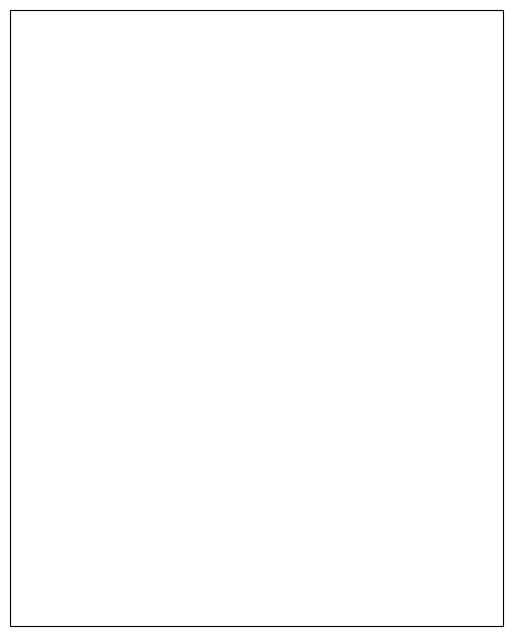

In [49]:
fig, ax = plt.subplots(figsize=(10, 8),subplot_kw=dict(projection=crs),sharex="all",sharey="all")
#fig, ax = plt.subplots(ncols=2, nrows=2, sharex="all", sharey="all",
#                           subplot_kw=dict(projection=crs))


In [63]:
def map_field(field, ax, **kwargs):
    import cartopy.feature as cfeature
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    return ax.imshow(field,
                  transform=crs,
                  extent=crs.bounds,
                  zorder=0,
                  **kwargs)


In [68]:
%matplotlib inline
import cartopy.feature as cfeature
kwargs = dict(vmin=0, vmax=.1, cmap="RdBu_r")

im = map_field(carra1_one_day["sd"][0,:,:],ax, **kwargs)
#cb = fig.colorbar(
#            im, ax=ax, orientation="vertical", label="snow depth [m]", aspect=40
#        )
#cl = [axj.coastlines() for axj in ax]
# Add coastlines
#ax.coastlines(resolution='50m', color='black', linewidth=1)

# Optionally, you can also add other features:
# Add country borders
#ax.add_feature(cfeature.BORDERS, linestyle=':')
fig.suptitle("Snow depth from CARRA on 2016-09-01")
plt.show()

In [69]:
fig.savefig("carra1.png")